In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('Data/newdata.csv',index_col=[0])

In [6]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Down,Flat,Up,LVH,Normal,ST,ASY,ATA,NAP,TA
0,40,1,140,289,0,172,0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,49,0,160,180,0,156,0,1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,130,283,0,98,0,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,48,0,138,214,0,108,1,1.5,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,54,1,150,195,0,122,0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']

In [24]:
# Split dataset into training and testing set: 30% testing and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
#Identify optimal n_estimators
param_grid = {'n_estimators': range(10, 300, 10)}
clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
optimal_estimators = grid_search.best_params_['n_estimators']
print(optimal_estimators)

80


In [26]:
#Random Forest Classifier with optimal estimators
clf=RandomForestClassifier(n_estimators=260,min_samples_split= 2, min_samples_leaf= 1,max_features='sqrt',max_depth=None, bootstrap=False)

#Fit training data
clf.fit(X_train,y_trainpr

#Use train model to predict the output for X_test
y_pred=clf.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       113
           1       0.87      0.90      0.88       163

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.86       276
weighted avg       0.86      0.86      0.86       276



In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[ 92  21]
 [ 17 146]]


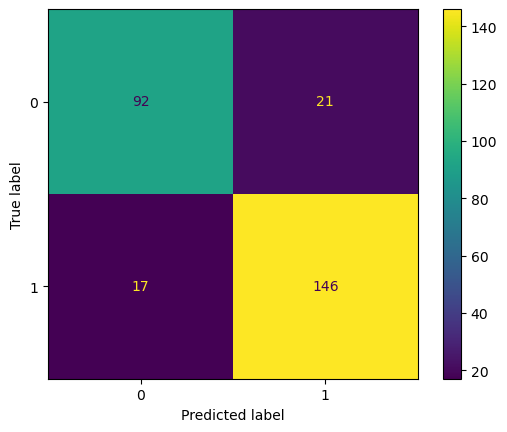

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
...                               display_labels=clf.classes_)
disp.plot()

In [ ]:
# add feature importance metric